In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm,LabelEncoder
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [150]:
sms_data = pd.read_csv('sms.csv',encoding='latin-1', sep=',' , usecols=[0,1])
 
sms_data = sms_data.rename(columns={'v1': 'label', 'v2': 'message'})

sms_data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [151]:
sms_data.shape

(5572, 2)

In [152]:
sms_data.isnull().sum()

label      0
message    0
dtype: int64

In [153]:
sms_data.duplicated().sum()

403

In [154]:
sms_data.drop_duplicates(inplace=True)
sms_data.reset_index(drop=True, inplace=True)
sms_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [155]:
sms_data.duplicated().sum()

0

In [156]:
sms_data.shape

(5169, 2)

In [157]:
sms_data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21a05c480d0>,
 [Text(0.5038421623606261, -0.977825687649782, 'ham'),
  Text(-0.5038422539112726, 0.9778256404766694, 'spam')],
 [Text(0.2748229976512505, -0.5333594659907901, '87.4%'),
  Text(-0.27482304758796683, 0.5333594402600015, '12.6%')])

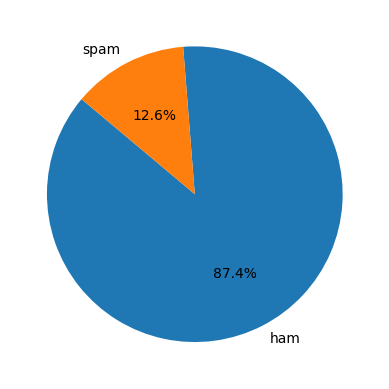

In [158]:
plt.pie(sms_data['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=140)

In [159]:
email_data = pd.read_csv('emails.csv',encoding='latin-1', sep=',',usecols=[1,2])
email_data = email_data.rename(columns={'v1label': 'label', 'text': 'message'})
 
email_data.head()

,label,message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [160]:
email_data.shape

(5171, 2)

In [161]:
email_data['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [163]:
email_data.isnull().sum()

label      0
message    0
dtype: int64

In [164]:
final_data = pd.concat([email_data, sms_data], axis=0, ignore_index=True)
final_data.head()

,label,message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [165]:
final_data.shape

(10340, 2)

In [168]:
final_data = final_data[['label','message']]

In [169]:
final_data.isna().sum()

label      0
message    0
dtype: int64

In [170]:
final_data.to_csv('spamham.csv',index=False)

In [174]:
data = pd.read_csv('spamham.csv', encoding='latin-1',sep=',')
data.head()

,label,message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [175]:
data.shape

(10340, 2)

In [177]:
count1 = Counter(" ".join(data[data['label']=='ham']["message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['label']=='spam']["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

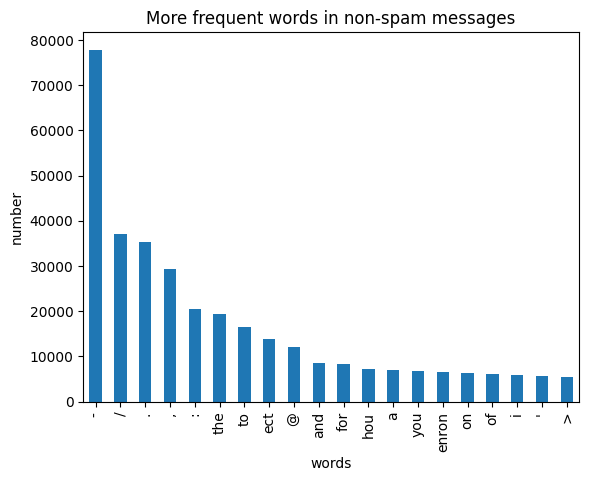

In [178]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

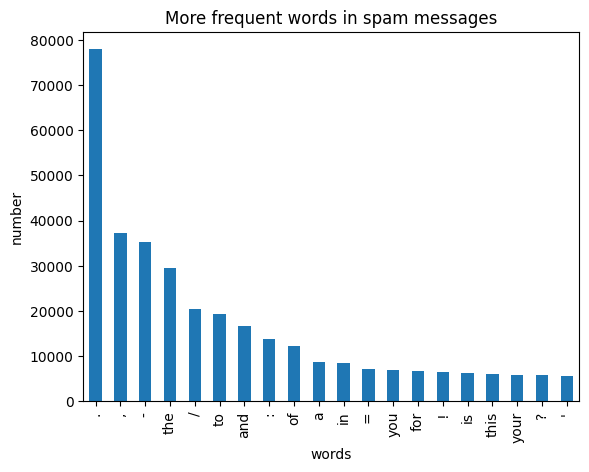

In [181]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [194]:

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer ,  WordNetLemmatizer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# 1. Lowercase
data['message'] = data['message'].str.lower()

# 2. Remove digits
data['message'] = data['message'].str.replace(r'\d+', '', regex=True)

# 3. Remove punctuation / special chars
data['message'] = data['message'].str.replace(r'[^\w\s]', ' ', regex=True)

# 4. Remove extra spaces
data['message'] = data['message'].str.replace(r'\s+', ' ', regex=True).str.strip()

# 5. Tokenize, remove stopwords, apply stemming
def clean_text(text):
    words = word_tokenize(text)
    words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

data['message'] = data['message'].apply(clean_text)


In [195]:
data.head()

,label,message
0,ham,subject enron methanol meter follow note gave ...
1,ham,subject hpl nom januari see attach file hplnol...
2,ham,subject neon retreat ho ho ho around wonder ti...
3,spam,subject photoshop window offic cheap main tren...
4,ham,subject indian spring deal book teco pvr reven...


In [216]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [220]:
example='this is a boy'
print(clean_text(example))

boy


In [221]:
def stemming(text):
    words = word_tokenize(text)
    stemmed_words = [ps.stem(w) for w in words]
    return " ".join(stemmed_words)


In [224]:
data['message'] = data['message'].apply(stemming)


In [222]:
lemma = WordNetLemmatizer()

def lemmatization(text):
    words = word_tokenize(text)
    lemma_words = [lemma.lemmatize(w) for w in words]
    return " ".join(lemma_words)


In [227]:
data['message'] = data['message'].apply(lemmatization)
data.head()

,label,message
0,ham,subject enron methanol meter follow note gave ...
1,ham,subject hpl nom januari see attach file hplnol...
2,ham,subject neon retreat ho ho ho around wonder ti...
3,spam,subject photoshop window offic cheap main tren...
4,ham,subject indian spring deal book teco pvr reven...


In [223]:
example = "this is a boys running faster"

print("Stemming:", stemming(example))
print("Lemmatization:", lemmatization(example))


Stemming: thi is a boy run faster
Lemmatization: this is a boy running faster


In [228]:
print(data['message'][0].split())

['subject', 'enron', 'methanol', 'meter', 'follow', 'note', 'gave', 'monday', 'preliminari', 'flow', 'data', 'provid', 'daren', 'plea', 'overrid', 'pop', 'daili', 'volum', 'present', 'zero', 'reflect', 'daili', 'activ', 'obtain', 'ga', 'control', 'chang', 'need', 'asap', 'econom', 'purpo']


In [232]:
x = feature_extraction.text.CountVectorizer(lowercase=True)
X = x.fit_transform(data['message']).toarray()
y = data['label'].values

In [233]:
print(x)

CountVectorizer()


In [237]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


In [238]:
#let's map the values of target column (label)
data["label"]=data["label"].map({'spam':1,'ham':0})


In [245]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(7238, 39874) (3102, 39874) (7238,) (3102,)


In [251]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MultinomialNB(alpha=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9461637653127015
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2493
           1       0.90      0.82      0.86       609

    accuracy                           0.95      3102
   macro avg       0.93      0.90      0.91      3102
weighted avg       0.95      0.95      0.95      3102

